### Importing require python packages

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os

### Gathering Data 

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
filename = "image_predictions2.tsv"
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r= requests.get(url)
with open(filename, 'wb') as file:
     for chunk in r:
            file.write(chunk)
           
               

In [4]:
image_pre = pd.read_csv('image_predictions2.tsv',sep="\t")

In [5]:
import json
tweets = []
file = "tweet_json.txt"

with open(file, 'r') as f:
    for line in f.readlines():
        tweets.append(json.loads(line))

In [6]:
df = pd.DataFrame()
df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets))
df['retweet_id']=list(map(lambda tweet: tweet['retweet_count'], tweets))
df['favorite']= list(map(lambda tweet: tweet['favorite_count'], tweets))

### Copying Gathered Data 

In [7]:
pd.set_option('display.max_colwidth', -1)


In [8]:
twitter_archive_clean6 = twitter_archive.copy()

In [9]:
image_pre_clean2 = image_pre.copy()

In [10]:
df_clean1 = df.copy()

### Visual and Programmatic Assessment

In [11]:
twitter_archive_clean6.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [12]:
twitter_archive_clean6.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [13]:
twitter_archive_clean6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_archive_clean6.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
image_pre_clean2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [16]:
image_pre_clean2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [17]:
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_pre_clean2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
image_pre_clean2.duplicated().sum()

0

In [20]:
image_pre.duplicated().sum()

0

In [21]:
df_clean1.head(3)

,tweet_id,retweet_id,favorite
0,892420643555336193,8249,37826
1,892177421306343426,6093,32502
2,891815181378084864,4034,24461


In [22]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id      2339 non-null int64
retweet_id    2339 non-null int64
favorite      2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


## Quality and Tidiness Issues
### Quality Issues
- `twitter_archive_clean`
    - in_reply_to_status_id,in_reply_to_user_id columns have only 78 values(Completeness issue)
    - timestamp is string but it should in datetime format(Validity issue)
    - removing retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp(Accuracy issue)
    - changing Nan to standard nan(Consistency issue)
    - rating denominator should be 10, but rating_numerator values are more than 10 and some values more than 100, i don'             know how to handle(Validity issue)
    - changing data type of tweet_ id from int to string(validity issue)
    - rating_denominator and rating_numerator should be float(validity issue)
    - tweet_id should be string(validity issue)
- `image_pre_clean` 
    - img_num is not neccessary('accuracy issue)
    - p1_dog, p2_dog ,p3_dog are conflict, beacause they consist apart from dog names(Consistency issue)
    - changing p1,p2,p3 as probability(Consistency issue)
    - p1_dog,p2_dog,p3_dog as probability_of_dog(Consistency issue)



### Tidiness Issues
- The 4 different columns doggo, floofer, pupper and puppo, are all relative to the same variable that identifies the stage of dog. So we can melt these columns into a single column named "dog stage"
- df_clean should be part of twitter_acrchive
- megering three datasets in one datasets

In [23]:
image_pre_clean2.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
image_pre_clean2.shape

(2075, 12)

####  Define
1) Timestamp is string but it should in datetime format

#### Code

In [25]:
twitter_archive_clean6.timestamp = pd.to_datetime(twitter_archive_clean6.timestamp)

#### Test

In [26]:
# testing 1 code
twitter_archive_clean6.timestamp.dtype

dtype('<M8[ns]')

#### Define
2) Removing retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

#### Code

In [27]:
twitter_archive_clean6.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

#### Test

In [28]:
# testing 2 code
list(twitter_archive_clean6)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Define
3) Changing Nan to standard nan


#### Code

In [29]:
#twitter_archive_clean6 = twitter_archive_clean6.fillna('no_data')
twitter_archive_clean6 = twitter_archive_clean6.replace('no_data',np.nan)

#### Test

In [30]:
# testing results
twitter_archive_clean6.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


####  Define
4) The 4 different columns doggo, floofer, pupper and puppo, are all relative to the same variable that identifies the stage of dog. So we can melt these columns into a single column named "dog stage"

#### Code

In [31]:
#twitter_archive_clean6 = pd.melt(twitter_archive_clean6,id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','name'],var_name="dog_stage")

In [32]:
# tired all in one columns
#twitter_archive_clean6.Types_dog.value_counts()
twitter_archive_clean6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 257.8+ KB


In [33]:
#https://cmdlinetips.com/2018/11/how-to-join-two-text-columns-into-a-single-column-in-pandas/
twitter_archive_clean6.doggo = twitter_archive_clean6.doggo.astype('category')
twitter_archive_clean6.floofer = twitter_archive_clean6.floofer.astype('category')
twitter_archive_clean6.pupper= twitter_archive_clean6.pupper.astype('category')
twitter_archive_clean6.puppo = twitter_archive_clean6.puppo.astype('category')


In [34]:
twitter_archive_clean6['dog_style'] = twitter_archive_clean6.doggo.str.cat(twitter_archive_clean6['floofer'],sep="|")
twitter_archive_clean6['dog_style'] = twitter_archive_clean6.dog_style.str.cat(twitter_archive_clean6['pupper'],sep="|")
twitter_archive_clean6['dog_style'] = twitter_archive_clean6.dog_style.str.cat(twitter_archive_clean6['puppo'],sep="|")

In [35]:
twitter_archive_clean6.dog_style.value_counts()

None|None|None|None        1976
None|None|pupper|None      245 
doggo|None|None|None       83  
None|None|None|puppo       29  
doggo|None|pupper|None     12  
None|floofer|None|None     9   
doggo|None|None|puppo      1   
doggo|floofer|None|None    1   
Name: dog_style, dtype: int64

In [36]:
# Handle multiple stages
#df.loc[df.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
#df.loc[df.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
#df.loc[df.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
# Handle missing values
#df.loc[df.stage == '', 'stage'] = np.nan

In [37]:
#thank you, but this way is not working,i apoloize that, i used different method
#twitter_archive_clean6.loc[twitter_archive_clean6.dog_style =='None|None|None|None','dog_style'] == np.nan
#twitter_archive_clean6.loc[twitter_archive_clean6.dog_style =='None|None|pupper|None','dog_style'] == 'pupper'
#twitter_archive_clean6.loc[twitter_archive_clean6.dog_style =='doggo|None|None|None','dog_style'] == 'doggo'
#twitter_archive_clean6.loc[twitter_archive_clean6.dog_style =='None|None|None|puppo','dog_style'] == 'puppo'
#twitter_archive_clean6.loc[twitter_archive_clean6.dog_style =='doggo|None|pupper|None','dog_style'] == 'doggo,pupper'
#twitter_archive_clean6.loc[twitter_archive_clean6.dog_style =='None|floofer|None|None','dog_style'] == 'floofer'
#twitter_archive_clean6.loc[twitter_archive_clean6.dog_style =='doggo|floofer|None|None','dog_style'] == 'doggo,floofer'
#twitter_archive_clean6.loc[twitter_archive_clean6.dog_style =='doggo|None|None|puppo ','dog_style'] == 'doggo,puppo'


In [38]:
twitter_archive_clean6.dog_style = twitter_archive_clean6.dog_style.apply(lambda x:x.replace('None|None|None|None','NaN'))
twitter_archive_clean6.dog_style = twitter_archive_clean6.dog_style.apply(lambda x:x.replace('None|None|pupper|None','pupper'))
twitter_archive_clean6.dog_style = twitter_archive_clean6.dog_style.apply(lambda x:x.replace('doggo|None|None|None','doggo'))
twitter_archive_clean6.dog_style = twitter_archive_clean6.dog_style.apply(lambda x:x.replace('None|None|None|puppo','puppo'))
twitter_archive_clean6.dog_style = twitter_archive_clean6.dog_style.apply(lambda x:x.replace('None|floofer|None|None','floofer'))
twitter_archive_clean6.dog_style = twitter_archive_clean6.dog_style.apply(lambda x:x.replace('doggo|floofer|None|None','doggo,floofer'))
twitter_archive_clean6.dog_style = twitter_archive_clean6.dog_style.apply(lambda x:x.replace('doggo|None|None|puppo','doggo,puppo'))
twitter_archive_clean6.dog_style = twitter_archive_clean6.dog_style.apply(lambda x:x.replace('doggo|None|pupper|None','doggo,pupper'))

#### Test

In [39]:
# tested above code
twitter_archive_clean6.dog_style.value_counts()

NaN              1976
pupper           245 
doggo            83  
puppo            29  
doggo,pupper     12  
floofer          9   
doggo,floofer    1   
doggo,puppo      1   
Name: dog_style, dtype: int64

In [40]:
twitter_archive_clean6.dog_style = twitter_archive_clean6.dog_style.astype(str)
twitter_archive_clean6 = twitter_archive_clean6.drop(columns=['pupper','doggo','puppo','floofer'])

In [41]:
twitter_archive_clean6.rename(index=str,columns={'dog_style':'dog_stage'},inplace=True)

In [42]:
twitter_archive_clean6.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN


#### Define
5) Rating_denominator and Rating_numerator correcting

#### Code

In [43]:
#twitter_archive_clean6.rating_denominator a
# see below the code

#### Test

In [44]:
twitter_archive_clean6.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [45]:
n = twitter_archive_clean6.query('rating_numerator > 15')

In [46]:
n1 = twitter_archive_clean6.query('rating_numerator < 15')

In [47]:
n1[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10
8,890609185150312448,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10


In [48]:
n[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [49]:
# few error data in numerator
#835246439529840640 
#680494726643068929 
#778027034220126208 
#786709082849828864 
#832215909146226688 
#666287406224695296 
#883482846933004288 

In [50]:
twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 740373189193256964), 'rating_denominator'] = 10

twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 682962037429899265), 'rating_denominator'] = 10

twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 666287406224695296), 'rating_denominator'] = 10

twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 722974582966214656), 'rating_denominator'] = 10

twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_clean6.loc[(twitter_archive_clean6.tweet_id == 716439118184652801), 'rating_denominator'] = 10

In [51]:
twitter_archive_clean6.rating_numerator.duplicated().sum()

2314

In [52]:
twitter_archive_clean6.rating_numerator.value_counts()

12.00      558
11.00      464
10.00      462
13.00      352
9.00       158
8.00       102
14.00      55 
7.00       54 
5.00       35 
6.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       8  
0.00       2  
15.00      2  
13.50      2  
420.00     2  
960.00     1  
84.00      1  
24.00      1  
17.00      1  
143.00     1  
99.00      1  
666.00     1  
121.00     1  
182.00     1  
165.00     1  
45.00      1  
204.00     1  
75.00      1  
9.75       1  
1776.00    1  
60.00      1  
11.27      1  
11.26      1  
88.00      1  
144.00     1  
9.50       1  
20.00      1  
44.00      1  
80.00      1  
Name: rating_numerator, dtype: int64

#### Define
6) **img_num** is not neccessary


#### Code

In [53]:
image_pre_clean2.drop(columns = ['img_num'],inplace=True)

#### Test

In [54]:
list(image_pre_clean2)

['tweet_id',
 'jpg_url',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

#### Define
7) checking in p1_dog,p2_dog,p3_dog condition is false, Removing those values

#### Code

In [55]:
n = image_pre_clean2.query('p1_dog ==False & p2_dog==False & p3_dog == False').index
image_pre_clean2.drop(n,inplace=True)

In [56]:
#
image_pre_clean2.p1_dog.value_counts(),image_pre_clean2.p2_dog.value_counts(),image_pre_clean2.p3_dog.value_counts()


(True     1532
 False    219 
 Name: p1_dog, dtype: int64, True     1553
 False    198 
 Name: p2_dog, dtype: int64, True     1499
 False    252 
 Name: p3_dog, dtype: int64)

In [57]:
n_1 = image_pre_clean2.query('p2_dog == False').index
image_pre_clean2.drop(n_1,inplace=True)

In [58]:
n_2 = image_pre_clean2.query('p3_dog == False').index
image_pre_clean2.drop(n_2,inplace=True)

#### Test

In [59]:
# testing
image_pre_clean2.query('p1_dog ==False & p2_dog==False & p3_dog == False').sum()

tweet_id    0.0
jpg_url     0.0
p1          0.0
p1_conf     0.0
p1_dog      0.0
p2          0.0
p2_conf     0.0
p2_dog      0.0
p3          0.0
p3_conf     0.0
p3_dog      0.0
dtype: float64

#### Define
8) changing datatype of in_reply_to_status_id , in_reply_to_user_id as string

#### Code

In [60]:
twitter_archive_clean6.in_reply_to_status_id=twitter_archive_clean6.in_reply_to_status_id.astype(str)
twitter_archive_clean6.in_reply_to_user_id=twitter_archive_clean6.in_reply_to_user_id.astype(str)

#### Test

In [61]:
#testing above condition
twitter_archive_clean6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    2356 non-null object
in_reply_to_user_id      2356 non-null object
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null float64
rating_denominator       2356 non-null int64
name                     2356 non-null object
dog_stage                2356 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 300.9+ KB


#### Define
9) changing name columns none to nan

#### Code

In [62]:
twitter_archive_clean6.name = twitter_archive_clean6.name.replace('None',np.nan)

#### Test

In [63]:
# testing
twitter_archive_clean6.name

0       Phineas 
1       Tilly   
2       Archie  
3       Darla   
4       Franklin
5       NaN     
6       Jax     
7       NaN     
8       Zoey    
9       Cassie  
10      Koda    
11      Bruno   
12      NaN     
13      Ted     
14      Stuart  
15      Oliver  
16      Jim     
17      Zeke    
18      Ralphus 
19      Canela  
20      Gerald  
21      Jeffrey 
22      such    
23      Canela  
24      NaN     
25      NaN     
26      Maya    
27      Mingus  
28      Derek   
29      Roscoe  
         ...    
2326    quite   
2327    a       
2328    NaN     
2329    NaN     
2330    NaN     
2331    NaN     
2332    NaN     
2333    an      
2334    a       
2335    an      
2336    NaN     
2337    NaN     
2338    NaN     
2339    NaN     
2340    NaN     
2341    NaN     
2342    NaN     
2343    NaN     
2344    NaN     
2345    the     
2346    the     
2347    a       
2348    a       
2349    an      
2350    a       
2351    NaN     
2352    a       
2353    a     

#### Define
10) rating_denominator and rating_numerator should be float(validity issue)



#### Code


In [64]:
twitter_archive_clean6.rating_denominator = twitter_archive_clean6.rating_denominator.astype(float)

In [65]:
twitter_archive_clean6.rating_numerator = twitter_archive_clean6.rating_numerator.astype(float)

#### Test

In [66]:
twitter_archive_clean6.rating_denominator.dtype

dtype('float64')

In [67]:
twitter_archive_clean6.rating_numerator.dtype

dtype('float64')

In [68]:
twitter_archive_clean6['rating'] = twitter_archive_clean6.rating_numerator / twitter_archive_clean6.rating_denominator

#### Define
11) change data type for tweet_id for twitter_archieve_clean5,image_pre2,df_clean1

#### Code

In [69]:
twitter_archive_clean6.tweet_id = twitter_archive_clean6.tweet_id.astype(str)
df_clean1.tweet_id = df_clean1.tweet_id.astype(str)
image_pre_clean2.tweet_id = df_clean1.astype(str)

#### Test

In [70]:
print(twitter_archive_clean6.tweet_id.dtype)
print(df_clean1.tweet_id.dtype)
print(image_pre_clean2.tweet_id.dtype)

object
object
object


In [71]:
image_pre_clean2.jpg_url.duplicated().sum()

42

In [72]:
image_pre_clean2.jpg_url.drop_duplicates(inplace=True)


In [73]:
image_pre_clean2.jpg_url.duplicated().sum()

0

In [74]:
print(image_pre_clean2.jpg_url.dtype)

object


#### Define
Tidiness
1) combining three datasets in one dataset

#### Code

In [75]:
df_clean = pd.merge(twitter_archive_clean6,image_pre_clean2,how = 'left',on ='tweet_id')


In [76]:
twitter_archieve_master = pd.merge(df_clean,df_clean1,how = 'left',on ='tweet_id')

#### Test

In [77]:
twitter_archieve_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_id,favorite
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8249.0,37826.0
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,6093.0,32502.0
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,4034.0,24461.0
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,8394.0,41174.0
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,9101.0,39352.0
5,891087950875897856,nan,nan,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,...,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,3017.0,19778.0
6,890971913173991426,nan,nan,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10.0,Jax,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.0,11569.0
7,890729181411237888,nan,nan,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18322.0,63805.0
8,890609185150312448,nan,nan,2017-07-27 16:25:51,"<a href=""http:

In [78]:
twitter_archieve_master.name.value_counts()

a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Penny       10
Tucker      10
Bo          9 
Winston     9 
the         8 
Sadie       8 
an          7 
Bailey      7 
Buddy       7 
Daisy       7 
Toby        7 
Koda        6 
Bella       6 
Scout       6 
Oscar       6 
Stanley     6 
Rusty       6 
Dave        6 
Jack        6 
Jax         6 
Milo        6 
Leo         6 
Gus         5 
Alfie       5 
           .. 
Robin       1 
Marlee      1 
Dido        1 
Heinrich    1 
Jangle      1 
Frönq       1 
Dotsy       1 
Sailer      1 
Ralphie     1 
Chef        1 
Stormy      1 
Clifford    1 
Zuzu        1 
Fwed        1 
Shikha      1 
Ronduh      1 
William     1 
Teddy       1 
Cecil       1 
Maisey      1 
Tanner      1 
Blue        1 
Suki        1 
Pilot       1 
Harry       1 
Arlo        1 
Skittles    1 
Bubba       1 
Edgar       1 
Obi         1 
Name: name, Length: 956, dtype: int64

#### Visualization


In [79]:
famous_dog = twitter_archieve_master.groupby('name')['favorite'].mean()

In [80]:
n=famous_dog.nlargest(n=15)

In [81]:
famous_dog2 = twitter_archieve_master.groupby('name')['rating'].mean()

In [82]:
n2 = famous_dog2.nlargest(n=15)

#### Define
Tidiness
2) renaming names of p1_dog,p2_dog,p3_dog

#### Code

In [83]:
twitter_archieve_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    2356 non-null object
in_reply_to_user_id      2356 non-null object
timestamp                2356 non-null datetime64[ns]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null float64
rating_denominator       2356 non-null float64
name                     1611 non-null object
dog_stage                2356 non-null object
rating                   2356 non-null float64
jpg_url                  1344 non-null object
p1                       1344 non-null object
p1_conf                  1344 non-null float64
p1_dog                   1344 non-null object
p2                       1344 non-null object
p2_conf                  1344 non-null float64
p2_dog                   1344 non-null object
p3    

In [84]:
twitter_archieve_master.rename(index=str,columns={'p1':'dog_probability_breed1','p1_conf':'probability_of_dog_breed','p1_dog':'is_this_dog_breed','p2':'dog_probability_breed2','p2_conf':'probability_of_dog_breed_2','p2_dog':'is_this_dog_breed','p3':'dog_probability_breed3','p3_conf':'probability_of_dog_breed_3','p3_dog':'is_this_dog_breed'},inplace=True)

#### Test

In [85]:
twitter_archieve_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          1611 non-null object
dog_stage                     2356 non-null object
rating                        2356 non-null float64
jpg_url                       1344 non-null object
dog_probability_breed1        1344 non-null object
probability_of_dog_breed      1344 non-null float64
is_this_dog_breed             1344 non-null object
dog_probability_breed2        1344 non-null object
probability_of_dog_

In [86]:
twitter_archieve_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,probability_of_dog_breed,is_this_dog_breed,dog_probability_breed2,probability_of_dog_breed_2,is_this_dog_breed,dog_probability_breed3,probability_of_dog_breed_3,is_this_dog_breed,retweet_id,favorite
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8249.0,37826.0
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,6093.0,32502.0
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,4034.0,24461.0
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,8394.0,41174.0
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,9101.0,39352.0


#### Visual and Programmatic Assessment

In [87]:
import matplotlib.pyplot as plt

#### Ist Visualization

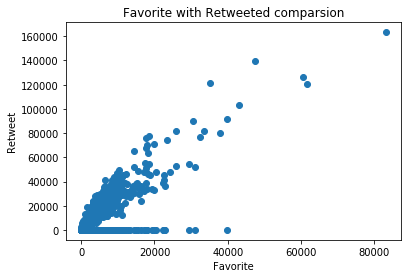

In [88]:
plt.scatter(twitter_archieve_master.retweet_id,twitter_archieve_master.favorite)
plt.title('Favorite with Retweeted comparsion')
plt.xlabel('Favorite')
plt.ylabel('Retweet')
plt.savefig('figure.jpg')
plt.show()


#### 2nd Visualization

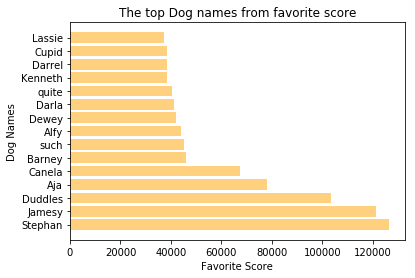

In [89]:
plt.barh(n.index,n,color='orange',alpha=0.5)
plt.xlabel('Favorite Score')
plt.ylabel('Dog Names')
plt.title("The top Dog names from favorite score")
plt.savefig('Favorite_dog.png')
plt.show()

#### 3rd Visualization


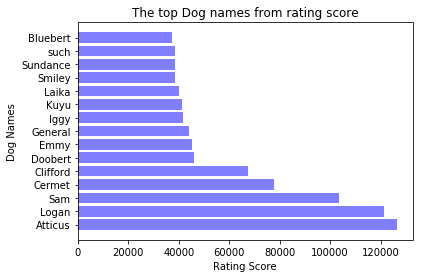

In [90]:
plt.barh(n2.index,n,color='blue',alpha=0.5)
plt.xlabel('Rating Score')
plt.ylabel('Dog Names')
plt.title("The top Dog names from rating score")
plt.savefig('Favorite_dog1.png')
plt.show()

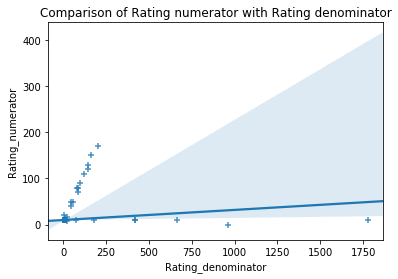

In [91]:
import seaborn as sns
x_axis = twitter_archieve_master.rating_numerator
y_axis = twitter_archieve_master.rating_denominator
av = sns.regplot(x=x_axis,y=y_axis,marker = "+")
plt.xlabel('Rating_denominator')
plt.ylabel('Rating_numerator')
#plt.xticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
plt.title('Comparison of Rating numerator with Rating denominator')
plt.savefig('figure4.png')
plt.show()

#### Save as csv file

In [92]:
twitter_archieve_master.to_csv('twitter_archive_master.csv',index = False)